In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. <pad>: 0.0769
	2. three: 0.0769
	3. blue: 0.0769
	4. green: 0.0769
	5. blank: 0.0769
	6. left: 0.0769
	7. bottom: 0.0769
	8. unrotate: 0.0769
	9. canvas: 0.0769
	10. white: 0.0769
	11. rotate: 0.0769
	12. position: 0.0769
	13. right: 0.0769
	14. up: 0.0769
	15. color: 0.0769
	16. red: 0.0769
	17. angle: 0.0769
	18. four: 0.0769
	19. has: 0.0769
	20. shape: 0.0769
	21. this: 0.0769
	22. is: 0.0769
	23. round: 0.0769
	24. <unk>: nan

Top-n images with largest absolute values of logits:


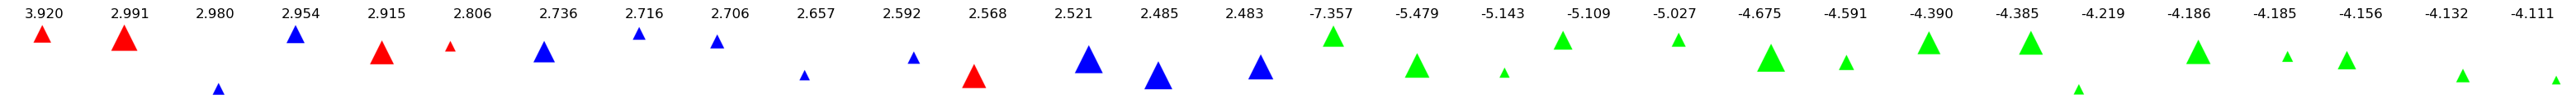

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. position: 0.9932
	2. is: 0.0145
	3. green: 0.0059
	4. round: 0.0000
	5. has: 0.0000
	6. four: 0.0000
	7. angle: 0.0000
	8. three: 0.0000
	9. left: 0.0000
	10. white: 0.0000
	11. blue: 0.0000
	12. red: 0.0000
	13. up: 0.0000
	14. rotate: 0.0000
	15. this: 0.0000
	16. shape: 0.0000
	17. canvas: 0.0000
	18. color: 0.0000
	19. bottom: 0.0000
	20. unrotate: 0.0000
	21. blank: 0.0000
	22. right: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


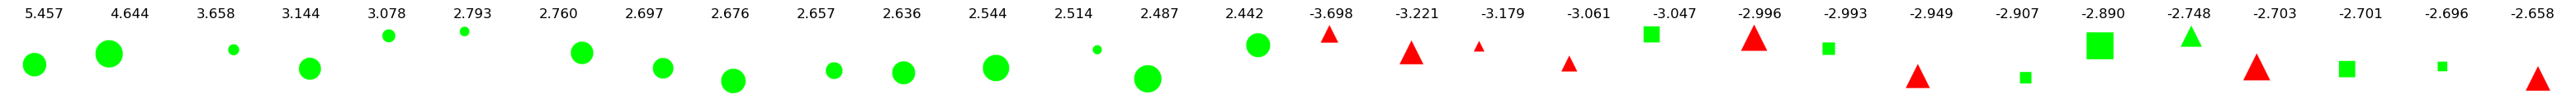

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. angle: 0.3742
	2. green: 0.2459
	3. round: 0.2406
	4. this: 0.2131
	5. blue: 0.2118
	6. three: 0.1827
	7. is: 0.1128
	8. right: 0.1048
	9. bottom: 0.0951
	10. four: 0.0883
	11. red: 0.0793
	12. white: 0.0444
	13. has: 0.0220
	14. left: 0.0105
	15. up: 0.0060
	16. unrotate: 0.0049
	17. color: 0.0010
	18. <pad>: 0.0000
	19. blank: 0.0000
	20. shape: 0.0000
	21. canvas: 0.0000
	22. position: 0.0000
	23. rotate: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


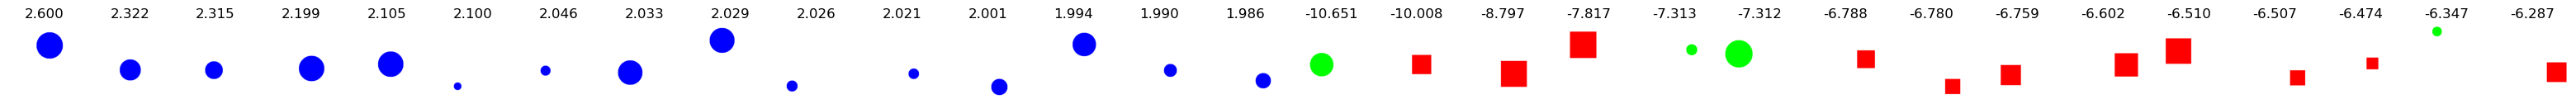

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. blank: 0.2009
	2. canvas: 0.1929
	3. white: 0.1853
	4. left: 0.1804
	5. rotate: 0.1235
	6. color: 0.1126
	7. bottom: 0.1082
	8. three: 0.0950
	9. is: 0.0932
	10. blue: 0.0876
	11. has: 0.0724
	12. position: 0.0507
	13. this: 0.0495
	14. round: 0.0482
	15. four: 0.0355
	16. up: 0.0152
	17. red: 0.0124
	18. shape: 0.0080
	19. unrotate: 0.0050
	20. green: 0.0012
	21. right: 0.0000
	22. <pad>: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


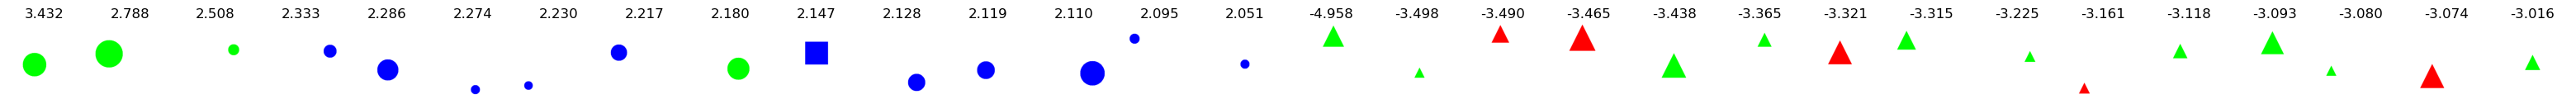

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. shape: 0.8003
	2. red: 0.1569
	3. has: 0.1448
	4. four: 0.0691
	5. this: 0.0243
	6. up: 0.0073
	7. <pad>: 0.0000
	8. is: 0.0000
	9. round: 0.0000
	10. blue: 0.0000
	11. green: 0.0000
	12. bottom: 0.0000
	13. right: 0.0000
	14. unrotate: 0.0000
	15. blank: 0.0000
	16. canvas: 0.0000
	17. color: 0.0000
	18. position: 0.0000
	19. white: 0.0000
	20. rotate: 0.0000
	21. left: 0.0000
	22. three: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


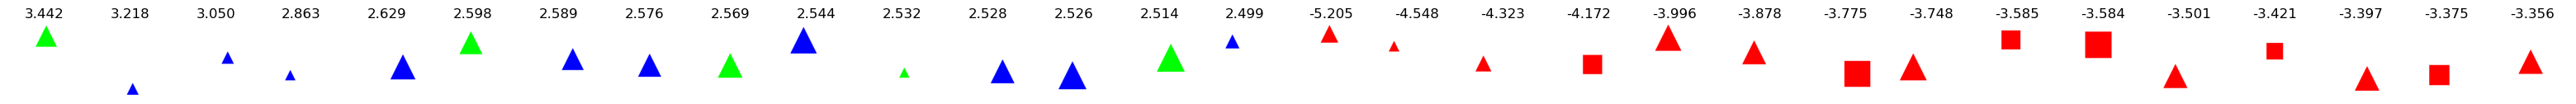

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. green: 0.8786
	2. red: 0.8041
	3. round: 0.6506
	4. blue: 0.0513
	5. three: 0.0256
	6. has: 0.0256
	7. four: 0.0256
	8. angle: 0.0256
	9. white: 0.0184
	10. bottom: 0.0178
	11. unrotate: 0.0174
	12. left: 0.0174
	13. canvas: 0.0171
	14. position: 0.0171
	15. color: 0.0171
	16. shape: 0.0171
	17. this: 0.0171
	18. rotate: 0.0168
	19. right: 0.0168
	20. up: 0.0163
	21. blank: 0.0156
	22. is: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


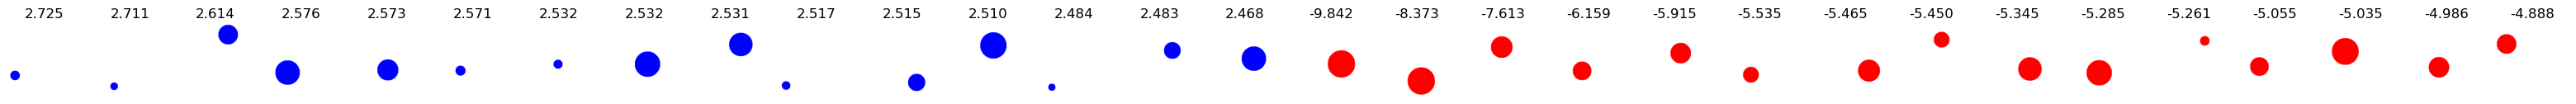

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. has: 0.7650
	2. red: 0.4023
	3. color: 0.2973
	4. four: 0.1409
	5. bottom: 0.0174
	6. three: 0.0075
	7. <pad>: 0.0000
	8. is: 0.0000
	9. round: 0.0000
	10. green: 0.0000
	11. blue: 0.0000
	12. blank: 0.0000
	13. right: 0.0000
	14. unrotate: 0.0000
	15. shape: 0.0000
	16. canvas: 0.0000
	17. this: 0.0000
	18. position: 0.0000
	19. rotate: 0.0000
	20. up: 0.0000
	21. left: 0.0000
	22. white: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


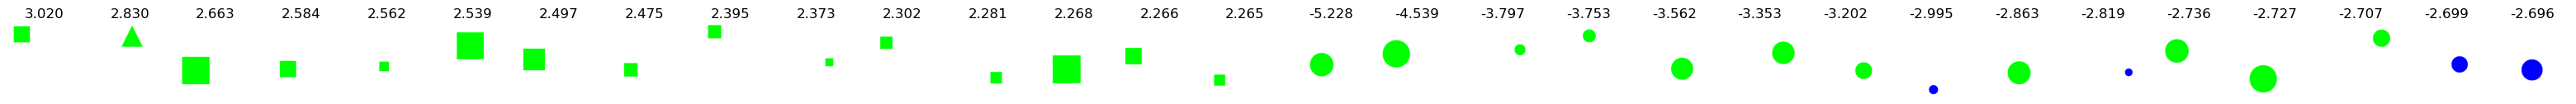

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. color: 0.8362
	2. four: 0.2670
	3. red: 0.1890
	4. has: 0.0177
	5. three: 0.0000
	6. <pad>: 0.0000
	7. is: 0.0000
	8. round: 0.0000
	9. green: 0.0000
	10. blue: 0.0000
	11. bottom: 0.0000
	12. white: 0.0000
	13. left: 0.0000
	14. rotate: 0.0000
	15. shape: 0.0000
	16. this: 0.0000
	17. canvas: 0.0000
	18. position: 0.0000
	19. unrotate: 0.0000
	20. right: 0.0000
	21. blank: 0.0000
	22. up: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


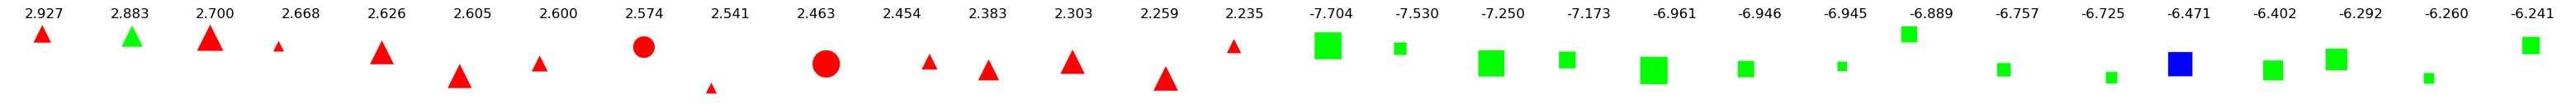

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. four: 0.5813
	2. bottom: 0.5410
	3. up: 0.4999
	4. is: 0.4723
	5. red: 0.3266
	6. round: 0.0428
	7. rotate: 0.0072
	8. green: 0.0017
	9. three: 0.0000
	10. has: 0.0000
	11. angle: 0.0000
	12. blue: 0.0000
	13. white: 0.0000
	14. left: 0.0000
	15. position: 0.0000
	16. color: 0.0000
	17. shape: 0.0000
	18. this: 0.0000
	19. canvas: 0.0000
	20. unrotate: 0.0000
	21. right: 0.0000
	22. blank: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


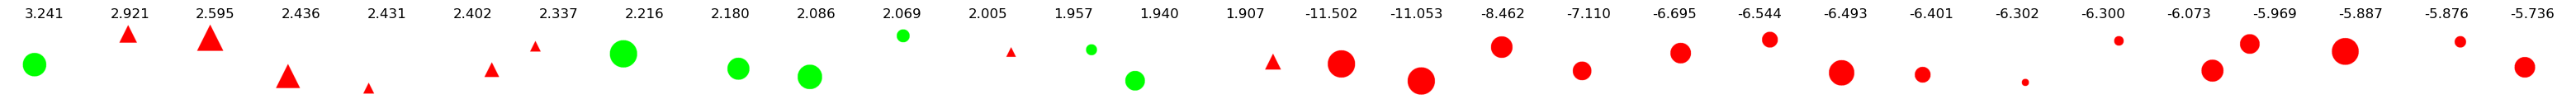

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. this: 0.6405
	2. round: 0.2763
	3. canvas: 0.2049
	4. red: 0.1481
	5. is: 0.0383
	6. up: 0.0008
	7. blue: 0.0000
	8. green: 0.0000
	9. three: 0.0000
	10. has: 0.0000
	11. four: 0.0000
	12. angle: 0.0000
	13. bottom: 0.0000
	14. white: 0.0000
	15. left: 0.0000
	16. unrotate: 0.0000
	17. position: 0.0000
	18. color: 0.0000
	19. shape: 0.0000
	20. rotate: 0.0000
	21. right: 0.0000
	22. blank: 0.0000
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


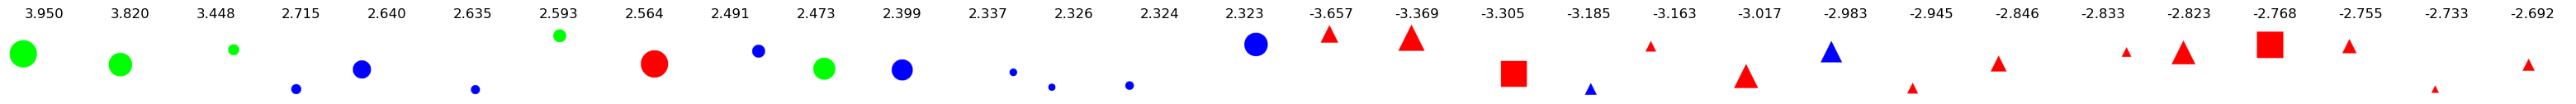

----------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):
    visualize_concept(i)